# Actividad 9
## Elias Villaseñor Flores 
## 1735689
## Estadística Aplicada
## Grupo 051

In [56]:
import pandas as pd

In [2]:
datos = pd.read_csv('supervivencia_examenes.csv')
datos

,id,tiempo,examen,calificación,género
0,1,85,1,100,m
1,2,109,1,100,m
2,3,118,1,100,m
3,4,120,1,100,f
4,5,106,1,98,f
5,6,103,1,98,m
6,7,108,1,96,f
7,8,119,1,96,f
8,9,115,1,96,f
9,10,108,1,94,f


In [3]:
datos = pd.get_dummies(datos,'género', drop_first=True )
datos

,id,tiempo,examen,calificación,género_m
0,1,85,1,100,1
1,2,109,1,100,1
2,3,118,1,100,1
3,4,120,1,100,0
4,5,106,1,98,0
5,6,103,1,98,1
6,7,108,1,96,0
7,8,119,1,96,0
8,9,115,1,96,0
9,10,108,1,94,0


a) Estadísticas descriptivas. Calcule el tiempo promedio que tardaron en
responder los alumnos el examen y la calificación promedio obtenida.
El profesor sospecha que las alumnas responden más rápido el examen,
calcule el tiempo promedio que tardaron en responder las alumnas y su
calificación promedio, asi como el tiempo promedio que tardaron en
responder los alumnos y su calificación promedio.
Elabore un print mostrando dichos resultados

In [4]:
datos['tiempo'].mean()

107.3529411764706

In [5]:
datos['calificación'].mean()

90.70588235294117

In [6]:
datosTM = datos[datos['género_m'] == 1]
datosTM
promTM=datosTM['tiempo'].mean()
promTM 

106.66666666666667

In [7]:
datosCM = datos[datos['género_m'] == 1]
datosCM
promCM=datosCM['calificación'].mean()

In [8]:
datosTF = datos[datos['género_m'] == 0]
datosTF
promTF=datosTF['tiempo'].mean()

In [9]:
datosCF = datos[datos['género_m'] == 0]
datosCF
promCF=datosCF['calificación'].mean()

In [10]:
print('La calificación promedio de hombres es de:', promCM, 'Y el tiempo promedio es de: ',promTM)

La calificación promedio de hombres es de: 88.66666666666667 Y el tiempo promedio es de:  106.66666666666667


In [11]:
print('La calificación promedio de mujeres es de:', promCF, 'Y el tiempo promedio es de: ',promTF)

La calificación promedio de mujeres es de: 93.0 Y el tiempo promedio es de:  108.125


b) ¿Cómo crees que se comporta el riesgo de entregar el examen conforme
transcurre el tiempo? ¿es constante, creciente, o decreciente? Según tu 
respuesta ajusta un modelo exponencial o Weibull, primero para todos
los individuos y muestra la función de riesgo.

### Creo que seran constantes

## Modelo exponencial

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from lifelines import ExponentialFitter

In [13]:
pip install lifelines

In [14]:
estimador_lamda = datos['examen'].sum()/datos['tiempo'].sum()
estimador_lamda

0.009315068493150684

In [15]:
exf = ExponentialFitter().fit(datos['tiempo'], datos['examen'])

In [16]:
exf.hazard_

,Exponential_estimate
85.0000,0.009315
87.1875,0.009315
89.3750,0.009315
91.5625,0.009315
93.7500,0.009315
95.9375,0.009315
98.1250,0.009315
100.3125,0.009315
102.5000,0.009315
104.6875,0.009315


c) Ahora estima el mismo modelo que planteaste en el inciso anterior, pero
para hombres y mujeres, y grafica ambas funciones de supervivencia
juntas (empalmadas), ¿gráficamente quien tarda más en entregar el
examen?

In [17]:
estimador_lamda = datosTM['examen'].sum()/datosTM['tiempo'].sum()
estimador_lamda

0.009375

In [18]:
exfM = ExponentialFitter().fit(datosTM['tiempo'], datosTM['examen'])

In [19]:
exfM.hazard_

,Exponential_estimate
85.00,0.009375
89.25,0.009375
93.50,0.009375
97.75,0.009375
102.00,0.009375
106.25,0.009375
110.50,0.009375
114.75,0.009375
119.00,0.009375


In [20]:
estimador_lamda = datosTF['examen'].sum()/datosTF['tiempo'].sum()
estimador_lamda

0.009248554913294798

In [21]:
exfF = ExponentialFitter().fit(datosTF['tiempo'], datosTF['examen'])

In [22]:
exfF.hazard_

,Exponential_estimate
90.000000,0.009249
94.285714,0.009249
98.571429,0.009249
102.857143,0.009249
107.142857,0.009249
111.428571,0.009249
115.714286,0.009249
120.000000,0.009249


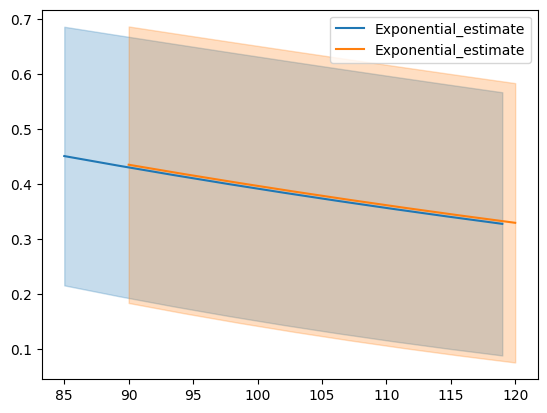

In [23]:
exfM.plot_survival_function()
exfF.plot_survival_function()
plt.show()
plt.show()

d) Estime la función de supervivencia del tiempo de entrega del examen de
todos los alumnos utilizando Kaplan-Meier, muestre los valores de la
función de supervivencia, los valores del intervalos de confianza al 95%,
asi como la gráfica respectiva de la función de supervivencia con sus
intervalos

In [24]:
from lifelines import KaplanMeierFitter 

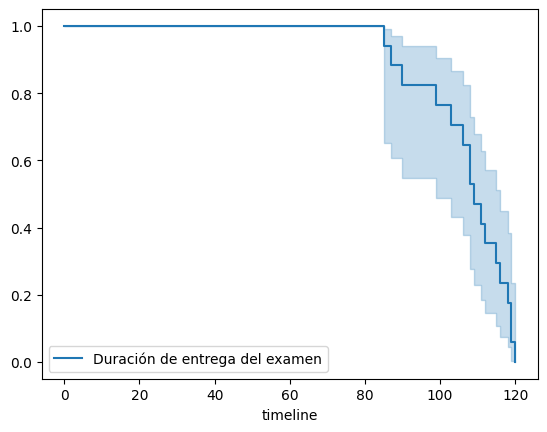

In [25]:
kmf = KaplanMeierFitter(label="Duración de entrega del examen")
kmf.fit(datos['tiempo'], datos['examen'])
kmf.plot();

In [26]:
kmf.survival_function_

,Duración de entrega del examen
timeline,
0.0,1.000000
85.0,0.941176
87.0,0.882353
90.0,0.823529
99.0,0.764706
103.0,0.705882
106.0,0.647059
108.0,0.529412
109.0,0.470588


In [27]:
kmf.confidence_interval_

,Duración de entrega del examen_lower_0.95,Duración de entrega del examen_upper_0.95
0.0,1.000000,1.000000
85.0,0.650179,0.991499
87.0,0.605979,0.969209
90.0,0.547132,0.939405
99.0,0.488278,0.904486
103.0,0.431478,0.865599
106.0,0.377147,0.823381
108.0,0.276168,0.730267
109.0,0.229598,0.679678
111.0,0.185759,0.626432


e) Realice un gráfico donde muestre la función de supervivencia de KaplanMeier de los alumnos (m) y de las alumnas (f) con sus respectivos
intervalos de confianza. Y comente con base en la gráfica si es posible que
el profesor tenga razón respecto a que las alumnas responden más
rápido el examen


In [28]:
Hombres = datos[datos['género_m']==0] 
Mujeres = datos[datos['género_m']==1] 

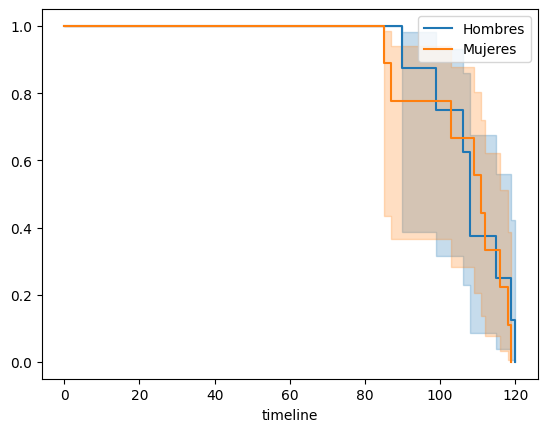

In [29]:
kmf1 = KaplanMeierFitter(label="Hombres")
kmf1.fit(Hombres['tiempo'], Hombres['examen'])

kmf2 = KaplanMeierFitter(label="Mujeres")
kmf2.fit(Mujeres['tiempo'],Mujeres['examen']) 

kmf1.plot();
kmf2.plot();

In [30]:
kmf1.confidence_interval_

,Hombres_lower_0.95,Hombres_upper_0.95
0.0,1.000000,1.000000
90.0,0.387000,0.981393
99.0,0.314807,0.930898
106.0,0.229333,0.860698
108.0,0.087006,0.674363
115.0,0.037067,0.558084
119.0,0.006593,0.422706
120.0,0.000000,0.000000


In [32]:
kmf2.confidence_interval_

,Mujeres_lower_0.95,Mujeres_upper_0.95
0.0,1.000000,1.000000
85.0,0.432965,0.983564
87.0,0.364751,0.939296
103.0,0.281682,0.878307
109.0,0.204242,0.804525
111.0,0.135872,0.719315
112.0,0.078289,0.622627
116.0,0.033711,0.513068
118.0,0.006129,0.387665
119.0,0.000000,0.000000


### Podemos decir conforme a la grafica que el profesor se equivoca al decir que las alumnas acaban mas rapido el examen que los hombres

f) Realice el log rank test para probar si las funciones de supervivencia de
alumnos y alumnas para responder el examen son iguales. Comente el
resultado de la prueba de hipótesis y diga si el profesor tiene razón o no 

In [34]:
from lifelines.statistics import logrank_test

In [36]:
results = logrank_test(Hombres['tiempo'], Mujeres['tiempo'], Hombres['examen'], Mujeres['examen'])
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53

### Podemos confirmar con un 95% de confianza que los alumnos y las alumnas tardan lo mismo en entregar el examen dado que p>0.005, por lo tanto el profesor esta equivocado.

g) El profesor tambien sospecha que quienes entregan el examen más
rápido es porque no estudiaron y cómo no saben que responder
entregan el examen casi inmediatamente.
Estime un modelo de cox de riesgos proporcionales donde utilice como
variables explicativas el género y la calificación obtenida, para explicar la
función de riesgo de entregar el examen.

In [38]:
from lifelines import CoxPHFitter

In [44]:
cph= CoxPHFitter()
cph.fit(datos, 'tiempo', 'examen')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.31
         time fit was run = 2022-10-06 01:21:40 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
id             0.10       1.10       0.24            -0.36             0.56                 0.70                 1.75
calificación   0.06       1.06       0.13            -0.19             0.30                 0.83                 1.36
género_m       0.50       1.66       0.80            -1.07             2.08                 0.34                 7.99

               cmp to    z    p   -log2(p)
covariate                                 
id               0.00 0.42 0.67       0.57
calificación     0.00 0.47 0.64       0.64
género_m         0.00 0.63 0.53       0.92
---
Concordance = 0.51
Partial AIC = 72.61
log-likelihood ratio test = 0.40 on 3 df
-log2(p) of ll-ratio test = 0.09

-Debemos notar que entre mas pequeño sea el Partial AIC, mejor. Nuestro Partial AIC es de 72.61, es un numero pequeño por lo tanto es conveniente.

-También notamos que el concordance esta cerca de estar entre el intervalo deseable (.55 - .75)

### Calificación

-Dado que el signo del coef de calificación es positivo, calificación no tiene efecto en el riesgo de entregar el examen.
-AL igual podemos notar que p>0.005 (0.64>0.05), por lo tanto se confirma lo dicho anteriormente.

### Género

-Dado que el signo del coef de género es positivo, género no tiene efecto en el riesgo de entregar el examen.
-Tambien lo podemos corroborar con el p>0.005 (0.53>0.05)

#### Con todo lo anterior se puede concluir que no hay relacion entre el tiempo de entrega de examen y la calificación.

h) Interprete los coeficientes de género y calificación obtenidos por el
modelo de cox, recuerde señalar: 1) si el coeficiente es significativo (se
rechaza Ho), en caso de ser significativo señala si aumentan el riesgo de
entregar el examen, y el tamaño del efecto. Recuerde añadir cph.plot()
para ayudarse con la interpretación

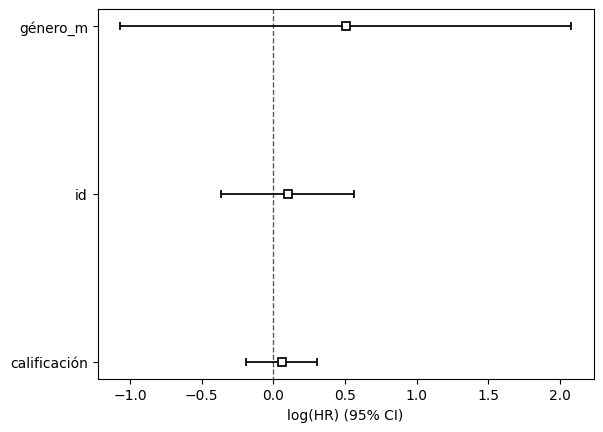

In [47]:
cph.plot();

#### Podemos interpretar que no hay significancia en el coeficiente, debido a que nunca se rechaza Ho ni para Calificación ni para género.
#### Conlcuimos que la calificación y el genero no influyen en el riesgo de entregar el examen.

i) Utilice cph.plot_partial_effects_on_outcome(covariates='variable',
values=[0,1]) para estimar las funciones de supervivencia de alumnos y
alumnas de acuerdo con el modelo de cox ¿obtiene resultados similares
al inciso c, es decir, coincide con las funciones de supervivencia de KaplanMeier?

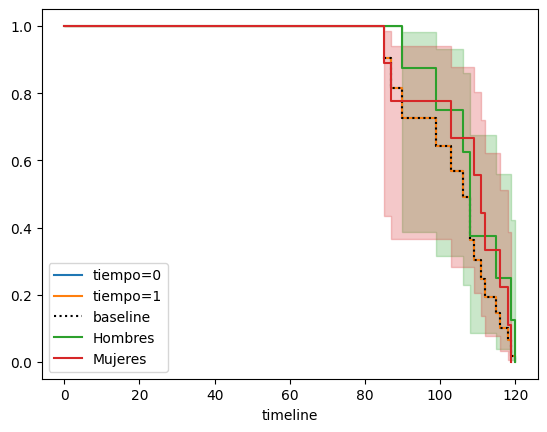

In [55]:
cph.plot_partial_effects_on_outcome(covariates='tiempo', values=[0,1])
kmf1.plot();
kmf2.plot();

### Podemos observar que si coincide con las funciones de supervivencia de KaplanMeier

j) Por último, con base en la interpretación del modelo de cox y la
significancia de los coeficientes, comente si el profesor tiene razón al
señalar que las alumnas responden en menor tiempo el examen, y si el
profesor tambien tiene razón al señalar que los que entregan el examen
rápido no estudiaron y por tanto obtienen menores calificación

### Dadas las conclusiones en el método cox, podemos decir que no hay relevancia entre el tiempo de entrega del examen y el género. Tampooco hay relevancia entre el tiempo de entrega del examen y la calificación, por lo tanto, el maestro se esquivoco en ambos casos.